In [1]:
from  pathlib import Path
import sys

In [2]:
ROOT= Path().resolve().parent
if str(ROOT/"src") not in sys.path:
    sys.path.insert(0,str(ROOT/"src"))

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import plotly.io as pio

In [5]:
pio.renderers.default = "png"

In [6]:
from data_workflow.viz import bar_sorted, time_line,histogram_chart, save_fig
from data_workflow.utils import bootstrap_diff_means

In [7]:
data_p= ROOT/"data/processed/analytics_table.parquet"
figs= ROOT/"reports/figures"
figs.mkdir(parents=True , exist_ok=True)

In [8]:
df= pd.read_parquet(data_p)
df.head()

,order_id,user_id,amount,quantity,created_at,status,sta_clean,amount__isna,quantity__isna,date,month,year,dow,hour,country,signup_date,amount_winsor,amount__is_outlier
0,A0001,0001,12.5,1,2025-12-01 10:05:00+00:00,Paid,paid,False,False,2025-12-01,2025-12,2025.0,Monday,10.0,SA,2025-11-15,12.5,False
1,A0002,0002,8.0,2,2025-12-01 11:10:00+00:00,paid,paid,False,False,2025-12-01,2025-12,2025.0,Monday,11.0,SA,2025-11-20,8.135,False
2,A0003,0003,<NA>,1,2025-12-02 09:00:00+00:00,Refund,refund,True,False,2025-12-02,2025-12,2025.0,Tuesday,9.0,AE,2025-11-22,<NA>,<NA>
3,A0004,0001,25.0,<NA>,2025-12-03 14:30:00+00:00,PAID,paid,False,True,2025-12-03,2025-12,2025.0,Wednesday,14.0,SA,2025-11-15,25.0,False
4,A0005,0004,100.0,1,NaT,paid,paid,False,False,None,NaT,NaN,None,NaN,SA,2025-11-25,97.75,True


In [9]:
df.shape

(5, 18)

In [10]:
df.dtypes

order_id                   string[python]
user_id                    string[python]
amount                            Float64
quantity                            Int64
created_at            datetime64[ns, UTC]
status                             object
sta_clean                          object
amount__isna                         bool
quantity__isna                       bool
date                               object
month                              object
year                              float64
dow                                object
hour                              float64
country                            object
signup_date                        object
amount_winsor                     Float64
amount__is_outlier                boolean
dtype: object

In [11]:
df.isna().sum()

order_id              0
user_id               0
amount                1
quantity              1
created_at            1
status                0
sta_clean             0
amount__isna          0
quantity__isna        0
date                  1
month                 0
year                  1
dow                   1
hour                  1
country               0
signup_date           0
amount_winsor         1
amount__is_outlier    1
dtype: int64

In [12]:
df.describe(include="all")

,order_id,user_id,amount,quantity,created_at,status,sta_clean,amount__isna,quantity__isna,date,month,year,dow,hour,country,signup_date,amount_winsor,amount__is_outlier
count,5,5,4.0,4.0,4,5,5,5,5,4,5,4.0,4,4.000000,5,5,4.0,4
unique,5,4,<NA>,<NA>,NaN,4,2,2,2,3,2,NaN,3,NaN,2,4,<NA>,2
top,A0001,0001,<NA>,<NA>,NaN,paid,paid,False,False,2025-12-01,2025-12,NaN,Monday,NaN,SA,2025-11-15,<NA>,False
freq,1,2,<NA>,<NA>,NaN,2,4,4,4,2,4,NaN,2,NaN,4,2,<NA>,3
mean,NaN,NaN,36.375,1.25,2025-12-02 05:11:15+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,11.000000,NaN,NaN,35.84625,NaN
min,NaN,NaN,8.0,1.0,2025-12-01 10:05:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,9.000000,NaN,NaN,8.135,NaN
25%,NaN,NaN,11.375,1.0,2025-12-01 10:53:45+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,9.750000,NaN,NaN,11.40875,NaN
50%,NaN,NaN,18.75,1.0,2025-12-01 22:05:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,10.500000,NaN,NaN,18.75,NaN
75%,NaN,NaN,43.75,1.25,2025-12-02 16:22:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,11.750000,NaN,NaN,43.1875,NaN
max,NaN,NaN,100.0,2.0,2025-12-03 14:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,14.000000,NaN,NaN,97.75,NaN


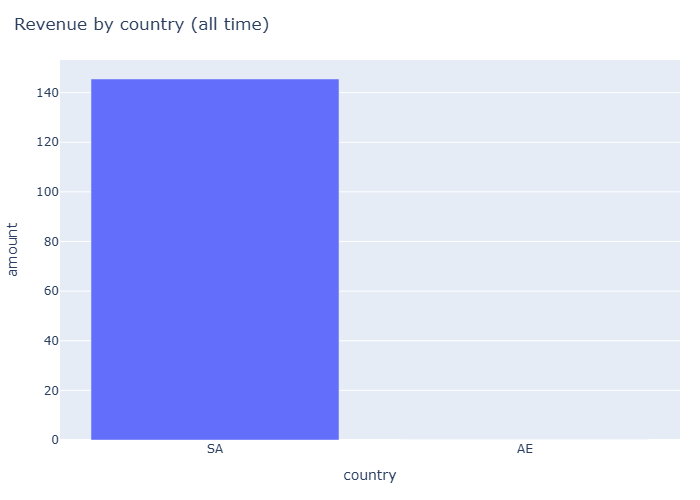

In [13]:
rev = df.groupby("country", dropna=False)["amount"].sum().reset_index()
fig = bar_sorted(rev, "country", "amount", "Revenue by country (all time)")
save_fig(fig, figs / "revenue_by_country.png")
fig.show()

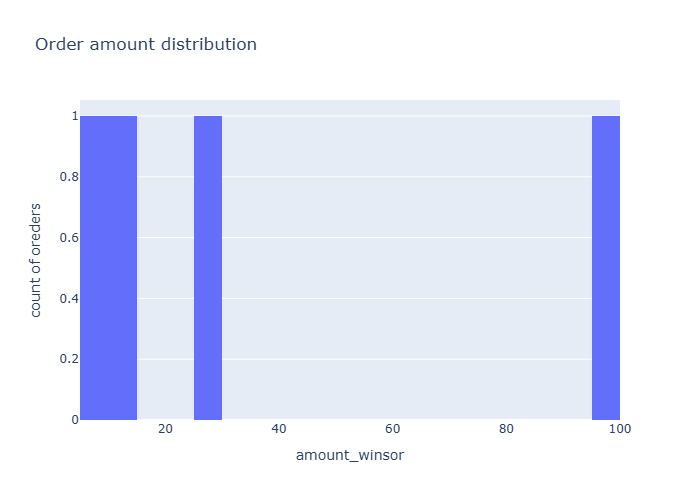

In [14]:
fig = histogram_chart(df, "amount_winsor", nbins=30, title="Order amount distribution")
save_fig(fig, figs / "amount_hist_winsor.png")
fig.show()

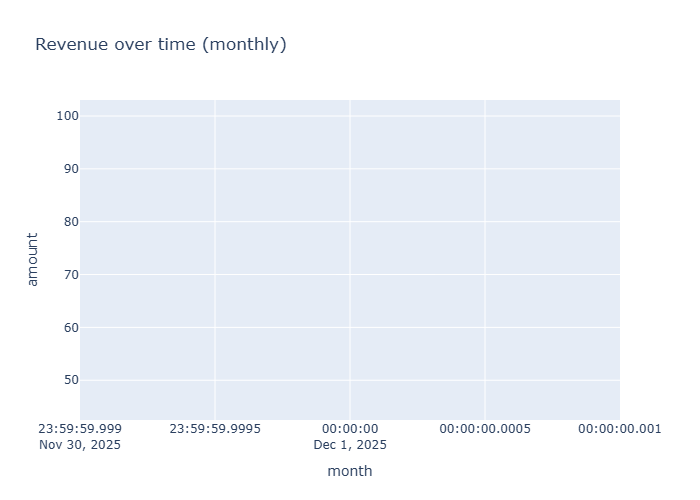

In [ ]:
trend = df.groupby("month", dropna=False)["amount"].sum().reset_index().sort_values("month")
fig = time_line(trend, "month", "amount", title="Revenue over time (monthly)")
save_fig(fig, figs / "revenue_trend_monthly.png")
fig.show()

In [16]:
d = df.assign(is_refund=(df["status"] == "refund").astype(int))
w = d.loc[d["country"] == "SA", "is_refund"]
u = d.loc[d["country"] == "AE", "is_refund"]
result = bootstrap_diff_means(w, u)

In [17]:
print(f"Difference: {result['diff_mean']:.4f}")
print(f"95% CI: [{result['ci_low']:.4f}, {result['ci_h']:.4f}]")

Difference: 0.0000
95% CI: [0.0000, 0.0000]
